# Animal Bites in Louisville, Kentucky area from 1985 to 2017

https://www.kaggle.com/datasets/rtatman/animal-bites?resource=download

From Kaggle description:

Context:
In the United States, animal bites are often reported to law enforcement (such as animal control). The main concern with an animal bite is that the animal may be rabid. This dataset includes information on over 9,000 animal bites which occurred near Louisville, Kentucky from 1985 to 2017 and includes information on whether the animal was quarantined after the bite occurred and whether that animal was rabid.

Content:
Attributes of animal bite incidents reported to and investigated by Louisville Metro Department of Public Health and Wellness. Personal/identifying data has been removed. This dataset is a single .csv with the following fields.

- bite_date: The date the bite occurred
- SpeciesIDDesc: The species of animal that did the biting
- BreedIDDesc: Breed (if known)
- GenderIDDesc: Gender (of the animal)
- color: color of the animal
- vaccination_yrs: how many years had passed since the last vaccination
- vaccination_date: the date of the last vaccination
- victim_zip: the zipcode of the victim
- AdvIssuedYNDesc: whether advice was issued
- WhereBittenIDDesc: Where on the body the victim was bitten
- quarantine_date: whether the animal was quarantined
- DispositionIDDesc: whether the animal was released from quarantine
- head_sent_date: the date the animal’s head was sent to the lab
- release_date: the date the animal was released
- ResultsIDDesc: results from lab tests (for rabies)

In [1]:
# Load python libraries

import pandas as pd
import numpy as np

import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load data
df = pd.read_csv('Health_AnimalBites.csv')

In [3]:
# View first 5 rows of data
df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [4]:
# Get info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


In [5]:
df['ResultsIDDesc'].value_counts()

UNKNOWN     1240
NEGATIVE     299
POSITIVE       4
Name: ResultsIDDesc, dtype: int64

In [6]:
# How many null values per column?
df.isna().sum()

bite_date             317
SpeciesIDDesc         118
BreedIDDesc          5244
GenderIDDesc         2526
color                2577
vaccination_yrs      5265
vaccination_date     4888
victim_zip           1838
AdvIssuedYNDesc      6438
WhereBittenIDDesc     616
quarantine_date      6983
DispositionIDDesc    7468
head_sent_date       8608
release_date         7558
ResultsIDDesc        7460
dtype: int64

There are numerous missing values.

In [7]:
# Fill null values in all categorical columns with 'UNKNOWN' 

df.loc[:, ('SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc', 'color', 'victim_zip', 'AdvIssuedYNDesc', 'WhereBittenIDDesc', 
    'DispositionIDDesc', 'ResultsIDDesc')] = df.loc[:, ('SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc', 'color', 'victim_zip', 'AdvIssuedYNDesc', 'WhereBittenIDDesc', 
    'DispositionIDDesc', 'ResultsIDDesc')].fillna('UNKNOWN')

In [8]:
# Check null values
df.isna().sum()

bite_date             317
SpeciesIDDesc           0
BreedIDDesc             0
GenderIDDesc            0
color                   0
vaccination_yrs      5265
vaccination_date     4888
victim_zip              0
AdvIssuedYNDesc         0
WhereBittenIDDesc       0
quarantine_date      6983
DispositionIDDesc       0
head_sent_date       8608
release_date         7558
ResultsIDDesc           0
dtype: int64

## How do bites vary over time?

In [9]:
print(round((df['bite_date'].isna().sum() / len(df)) * 100, 1),'% of rows are missing an entry for "bite_date".')

3.5 % of rows are missing an entry for "bite_date".


There are relatively few (3.5%) of rows with the 'bite_date' column missing. These will be dropped for an analysis of animal bites over time. Other date-oriented columns with missing data will be ignored for now.

In [10]:
# Make copy of original DataFrame
df_orig = df.copy()

# Drop null values in 'bite_date' column
df = df.dropna(subset='bite_date')

In [11]:
# Confirm values dropped
df['bite_date'].isna().sum()

0

In [12]:
# What does the 'bite_date' data look like sorted?
df['bite_date'].sort_values().head(10)

4345    1952-05-28 00:00:00
8570    1952-08-05 00:00:00
0       1985-05-05 00:00:00
1       1986-02-12 00:00:00
2       1987-05-07 00:00:00
3       1988-10-02 00:00:00
4       1989-08-29 00:00:00
5       1989-11-24 00:00:00
6       1990-02-08 00:00:00
7       1990-02-22 00:00:00
Name: bite_date, dtype: object

In [13]:
# 'bite_date' sorting continued
df['bite_date'].sort_values().tail(10)

9002    2017-09-07 00:00:00
9001    2017-09-07 00:00:00
8436    2018-04-17 00:00:00
3392    2020-08-08 00:00:00
3012    2021-04-22 00:00:00
1512    2101-02-18 00:00:00
5055    2201-01-21 00:00:00
6293    2201-02-21 00:00:00
6505    2201-05-01 00:00:00
4490    5013-07-15 00:00:00
Name: bite_date, dtype: object

There are dates before 1985 and after 2017, as well as some dates that seem erroneous. Those will be dropped.

In [14]:
# Drop erroneous values in 'bite_date' column
date_ind_list = [4345, 8570, 8436, 3392, 3012, 1512, 5055, 6293, 6505, 4490]
df.drop(date_ind_list, inplace=True)

In [15]:
# Convert to 'bite_date' to Pandas datetime object
df['bite_date'] = pd.to_datetime(df['bite_date'])

In [16]:
# Check 'bite_date' converted to datetime
df.dtypes

bite_date            datetime64[ns]
SpeciesIDDesc                object
BreedIDDesc                  object
GenderIDDesc                 object
color                        object
vaccination_yrs             float64
vaccination_date             object
victim_zip                   object
AdvIssuedYNDesc              object
WhereBittenIDDesc            object
quarantine_date              object
DispositionIDDesc            object
head_sent_date               object
release_date                 object
ResultsIDDesc                object
dtype: object

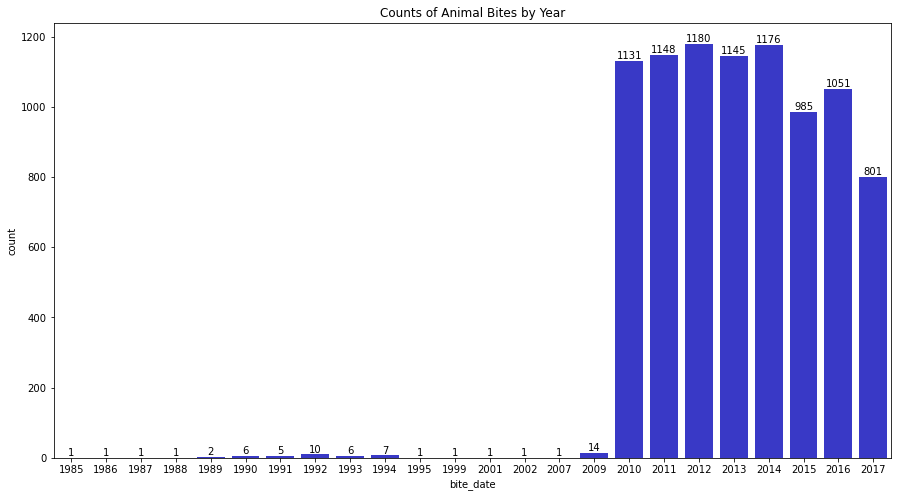

In [17]:
# Plot bite_date by year
fig, ax = plt.subplots(figsize=(15,8))
_ = sns.countplot(x=df['bite_date'].dt.year, color='b', saturation=0.55).set(title='Counts of Animal Bites by Year')
_ = ax.bar_label(ax.containers[0])

**Most animal bites were reported between the years 2010 to 2017. Perhaps this coincided with a public awareness campaign to report animal bites to the public authorities?**

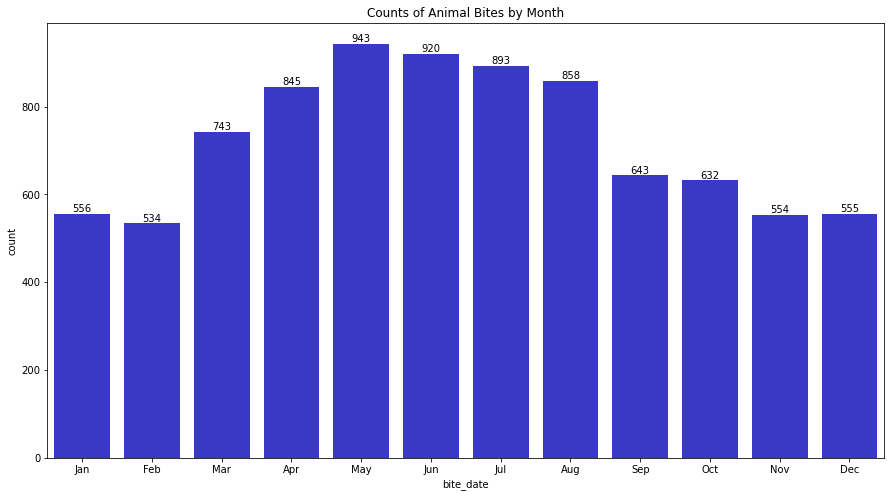

In [18]:
# Plot bite_date by month
fig, ax = plt.subplots(figsize=(15,8))
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
_ = sns.countplot(x=df['bite_date'].dt.strftime('%b'), order=order, color='b', saturation = 0.55
                 ).set(title='Counts of Animal Bites by Month')
_ = ax.bar_label(ax.containers[0])

**Animal bites occur more often between March and August. May is the month with the highest count of animal bites. It is likely that more animal bites are reported in the warmer months as people and animals are in increased contact outdoors.**

## Which species of animal has the most reported bites?

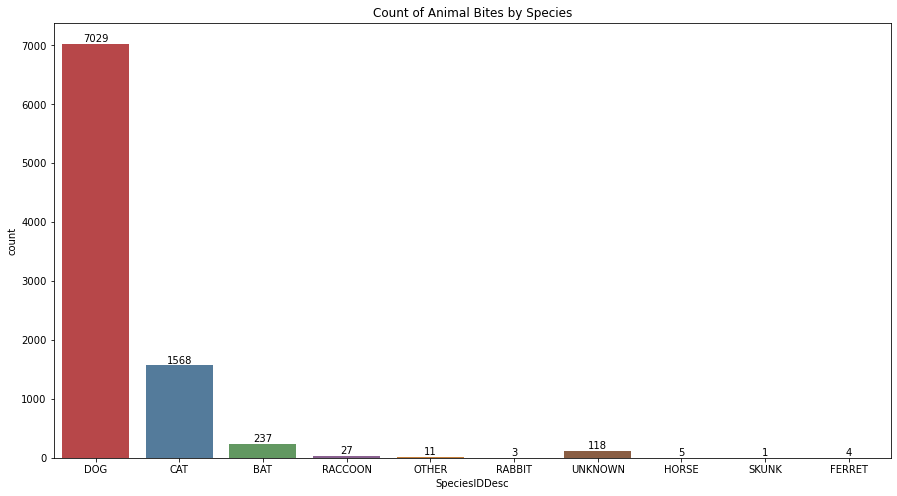

In [19]:
# Plot bite count by animal species
fig, ax = plt.subplots(figsize=(15,8))
_ = sns.countplot(x=df_orig['SpeciesIDDesc'], saturation = 0.55, palette='Set1').set(title='Count of Animal Bites by Species')
_ = ax.bar_label(ax.containers[0])

**Dogs bite more frequently than other species. Cats have the second highest amount of bites. Other species have much fewer bites than both dogs and cats. This is likely due to the abundance of dogs and cats as pets in people's homes. Additionally, dogs are potentially more aggressive toward people than cats.**

## Which breeds bite the most?

In [20]:
# List top 10 breeds
top10 = df_orig['BreedIDDesc'].value_counts().head(10)
print(top10)

UNKNOWN            5244
PIT BULL           1102
GERM SHEPHERD       327
LABRADOR RETRIV     253
BOXER               181
CHICHAUHUA          165
SHIH TZU            119
BEAGLE              116
ROTTWEILER           86
AAUST. TERR.         78
Name: BreedIDDesc, dtype: int64


In [21]:
top10_list = list(top10.index)
print(top10_list)

['UNKNOWN', 'PIT BULL', 'GERM SHEPHERD', 'LABRADOR RETRIV', 'BOXER', 'CHICHAUHUA', 'SHIH TZU', 'BEAGLE', 'ROTTWEILER', 'AAUST. TERR.']


In [22]:
top10_subset = df_orig[df_orig['BreedIDDesc'].isin(top10_list)]['BreedIDDesc']
print(top10_subset)

0               UNKNOWN
1               UNKNOWN
2               UNKNOWN
3               UNKNOWN
4               UNKNOWN
             ...       
8997         CHICHAUHUA
8998            UNKNOWN
9000    LABRADOR RETRIV
9001    LABRADOR RETRIV
9002              BOXER
Name: BreedIDDesc, Length: 7671, dtype: object


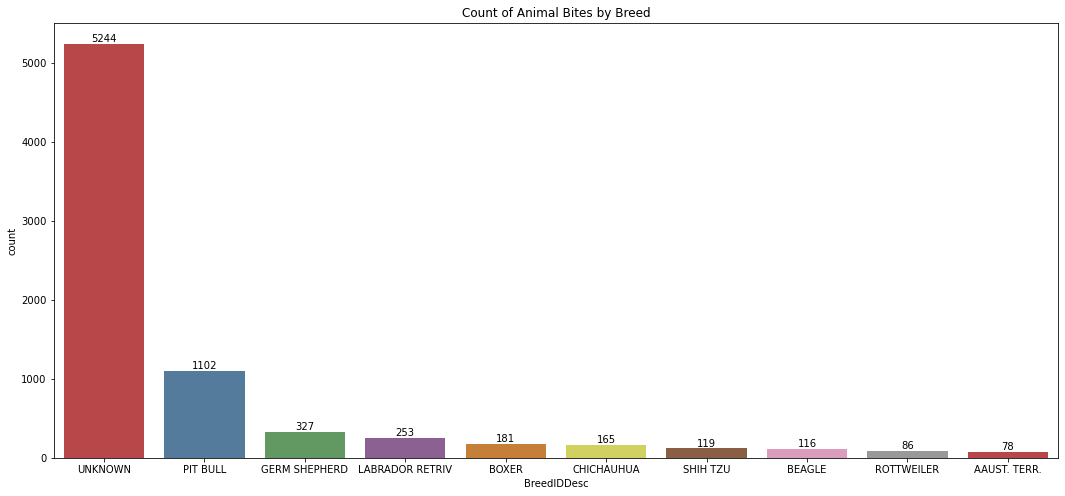

In [23]:
# Plot bite count by animal breed
fig, ax = plt.subplots(figsize=(18,8))
_ = sns.countplot(x=top10_subset, palette = 'Set1', saturation = 0.55, order=top10_subset.value_counts().index).set(title='Count of Animal Bites by Breed')
_ = ax.bar_label(ax.containers[0])

**Although the highest count of bites is of an unknown type (e.g. mixed breed or not reported), the rest of the breeds on the top 10 list are dog types. The pit bull breed seems to bite significantly more often than other individual breed types.**

## How much does bite count vary by animal gender?

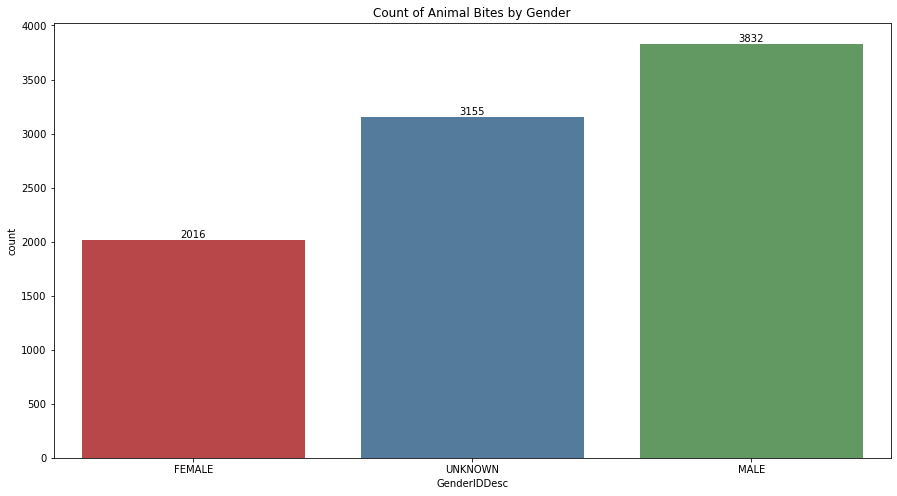

In [24]:
# Plot bite count by animal gender
fig, ax = plt.subplots(figsize=(15,8))
_ = sns.countplot(x=df_orig['GenderIDDesc'], saturation = 0.55, palette='Set1').set(title='Count of Animal Bites by Gender')
_ = ax.bar_label(ax.containers[0])

**There are many unknown data points here, but it appears that male animals bite more often than female animals.**

## What factors influence a positive rabies test?

In [25]:
df_orig['ResultsIDDesc'].value_counts()

UNKNOWN     8700
NEGATIVE     299
POSITIVE       4
Name: ResultsIDDesc, dtype: int64

**There are 4 positive rabies tests.**

In [26]:
df_orig[df_orig['ResultsIDDesc'] == 'POSITIVE']['SpeciesIDDesc'].value_counts()

BAT    3
DOG    1
Name: SpeciesIDDesc, dtype: int64

**3 of 4 positive rabies tests are from bats.**

In [27]:
df_orig[df_orig['ResultsIDDesc'] == 'NEGATIVE']['SpeciesIDDesc'].value_counts()

BAT        160
CAT         64
DOG         58
RACCOON      9
OTHER        5
UNKNOWN      3
Name: SpeciesIDDesc, dtype: int64

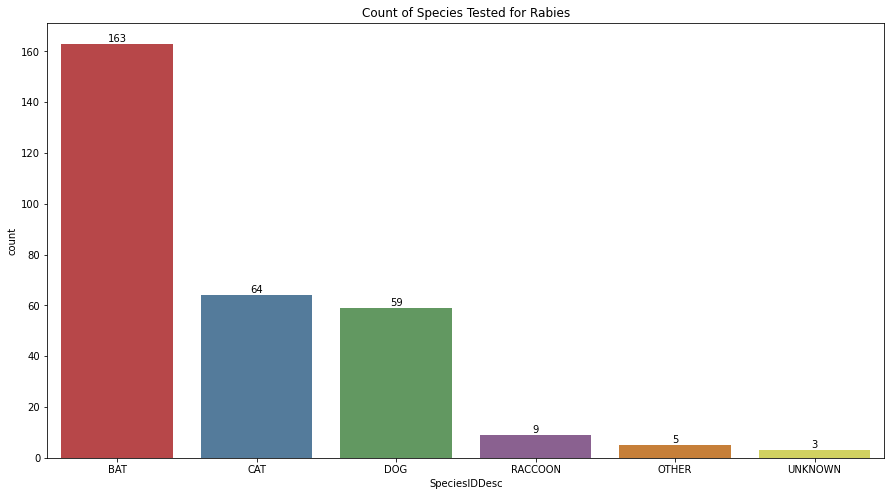

In [28]:
# Plot bite count by animal species
fig, ax = plt.subplots(figsize=(15,8))
_ = sns.countplot(
    x=df_orig[df_orig['ResultsIDDesc'] != 'UNKNOWN']['SpeciesIDDesc']
    , saturation = 0.55, palette='Set1'
    , order=df_orig[df_orig['ResultsIDDesc'] != 'UNKNOWN']['SpeciesIDDesc'].value_counts(
    ).index).set(title='Count of Species Tested for Rabies')
_ = ax.bar_label(ax.containers[0])

**Bats are most often tested for rabies, even though dogs make up the majority of animal bites in the dataset. Bats are wild animals that are not likely to be vaccinated for rabies as many dogs are. A bat that bites a human may be thought to be more likely to be rabid. The data suggests this, but the sample size is small and more data is needed to make reasonable conclusions.**  

In [29]:
# Calculate proportions of bites tested for rabies and positive rabies tests

test_length = len(df_orig[(df_orig['ResultsIDDesc'] == 'POSITIVE') | (df_orig['ResultsIDDesc'] == 'NEGATIVE')])
print(round(test_length / len(df_orig['ResultsIDDesc']) * 100, 2), '% of bites are tested for rabies.')

print(round(len(df_orig[df_orig['ResultsIDDesc'] == 'POSITIVE']
   ) / test_length * 100, 2), '% of rabies tests are positive.')

3.37 % of bites are tested for rabies.
1.32 % of rabies tests are positive.


**Fortunately, only 1.3% of rabies tests return a positive result. However, only 3.4% of animal bites are tested for rabies. It would be interesting to see the rabies positive rate with a larger sample of rabies tests.**

## Conclusions and Suggestions for Further Analysis 

- Although the dataset spans the range from 1985 to 2017, most animal bites are reported for 2010 to 2017. 
- Animal bites have an increasing trend in warmer months from March to August.
- Of all animal bites, dogs are by far the most reported species.
- Of breeds that are reported or known, pit bulls are the most frequently reported, followed by german shepherds and labrador retrievers.
- Male animals tend to bite more frequently than females.
- Rabies tests
    - Bat bites are most frequently tested for rabies, followed by cats then dogs.
    - 3.4% of animal bites are tested for rabies.
    - 1.3% of tests return a positive result, and 3 out of 4 of those were from bats.

**A more complete dataset is needed to come to robust conclusions. The dataset contains numerous missing values across all columns. Additionally, more bite occurrences should be tested for rabies to get a more accurate representation of the rate of rabies infection in animals that bite humans.**